# Планирование рекламной кампании для интернет-магазина

Интернет-магазин "Стримчик" попросил провести анализ данных для планирования рекламной кампании на 2017 год. В нашем распоряжении исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах, на которых были выпущены игры. Необходимо выявить определяющие успешность игры закономерности, чтобы ориентироваться, какой продукт будет потенциально популярным и прибыльным.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

## Обзор данных

In [87]:
import pandas as pd # импорт библиотек
import numpy as np
import matplotlib 
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# открываем данные
pd.set_option('display.max_columns', None)
df = pd.read_csv('datasets\\games.csv')
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [89]:
df.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть пропуски в столбцах с названием (всего два, не критично), годом релиза, много пропущенных данных с оценками критиков и рейтингом у игроков. Пока примерный план предобработки такойй:
- переименуем столбцы - приведем их к нижнему регистру;
- у столбца с годом релиза неправильный тип данных, как и у столбца 'user_score', нужно исправить;
- отредактируем жанры, чтобы потом было удобно делать срезы данных;
- после займемся заполнением пропусков.

## Предобработка данных

In [90]:
# приводим столбцы в удобный вид
df.columns = df.columns.str.lower()

Чтобы разобраться с датой релиза, сначала придется заняться пропусками в этом самом столбце. Рассуждения ниже.

In [91]:
df[df['year_of_release'].isna() == True].head(15) # срез с пропущенным годом выпуска

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Год издания - дата, которую не подставить средним значением или медианой, причем доля пропусков всего 1,6%, поэтому предлагаю их вообще не трогать `(по итогу удобнее вышло заменить пропуски числом, отличным от наших данных и перевести для лаконичности год в формат 'int'). Без заполнения NaN у меня упорно не переводится число года в "int", чтобы избавиться от нулей после точки.`

Судя по шапке среза данных, игры с пропущенным годом очень разнообразны как по платформе, так и по жанру и отзывам, причиной пропусков может быть как неправильная выгрузка данных, так и просто их изначальное отсутствие.

In [92]:
# манипуляции с годом
df['year_of_release'] = df['year_of_release'].fillna(999).astype('int')
try:
    df['user_score'] = pd.to_numeric(df['user_score']) # перевожу тип данных в числовой
except:
    print('Внимание, ошибка!')
    
df.info()

Внимание, ошибка!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Функция перевода типа данных пользовательского рейтинга выдает ошибку, стоит остановиться на значениях более подробно.

In [93]:
df['user_score'].unique() # уникальные значения рейтинга пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди оценок затесалось значение `tbd`: to be determined. Проще говоря, рейтинг не определен, а для нас это то же самое, что и пропуск.

In [94]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) # вместо tbd = пока что NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore') # повторно меняю тип
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [95]:
df['genre'] = df['genre'].str.lower() # к нижнему регистру
df['platform'] = df['platform'].str.lower()
df['genre'].value_counts()

action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64

In [96]:
df.isna().sum() # смотрим пропуски

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [97]:
df[df['name'].isna() == True] # пропущенные названия игр

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Судя по заполненности данных, коих мало, можем от них смело избавиться.

In [98]:
df = df.dropna(subset=['name']).reset_index(drop=True) # удаляем строки с пропусками в названиях

Возникает большой вопрос, что же мы будем делать с рейтингами и оценками игр? Больше половины данных отсутствует, опять же заполнением медианой мы только сделаем хуже и исказим вычисления. Удалением этих данных мы так же испортим будущие расчеты о продажах и предпочтениях ЦА каждого региона. Чтобы оставить эти данные, но так, чтобы они ничего не искажали, можно заменить значения резко выделяющимся числом, нам будет видно его на графиках, и если что будущие данные можно будет фильтровать по нему.

Вот какая есть информация о возрастном рейтинге, который выставляется ассоциацией ESRB. Нам, к слову, отлично подходит значение RP - можно заменить пропуски им.
* **EC и K-A** - для детей от 3 лет
* **E** - для всех от 6 лет
* **E10+** - для всех от 10 лет
* **T** - подросткам от 13 лет
* **M** - для взрослых от 17 лет
* **RP** - рейтинг ожидается
* **AO** - только для взрослых 18+

Неплохой вариант добавить отдельный столбец с расшифровкой всех аббревиатур, чтобы потом было удобнее интерпретировать результаты. Например, для всех, для детей от 10 лет, для взрослых от 17 лет, рейтинг не определен.

In [99]:
df['rating'].value_counts(dropna=False) # проверяем, что никаких рейтингов помимо вышеуказанных тут не наблюдается

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [100]:
# ставим значениe RP и учитываем, что в будущем анализе это означает отсутствие рейтинга

df['rating'] = df['rating'].fillna('RP') 

In [101]:
# столбец с понятным классификатором (упрощенный)

def rating_def(df):
    rating = df['rating']
    if rating in ['EC','K-A','E']:
        return 'для всех'
    elif rating in ['E10+','T']:
        return 'дети от 10 лет'
    elif rating in ['M','AO']:
        return 'взрослые от 17 лет'
    else:
        return 'без рейтинга'

df['new_rating'] = df.apply(rating_def, axis=1)

In [102]:
df['new_rating'].value_counts()

без рейтинга          6767
дети от 10 лет        4381
для всех              4001
взрослые от 17 лет    1564
Name: new_rating, dtype: int64

In [103]:
df['critic_score'] = df['critic_score'].fillna(999) # ставим значение-затычку для пропусков оценок
df['user_score'] = df['user_score'].fillna(999) 
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
new_rating         0
dtype: int64

In [104]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # столбец с общими продажами

## Исследовательский анализ данных

### Определение актуального периода

Посмотрим на графике, сколько игр выпускалось каждый год.

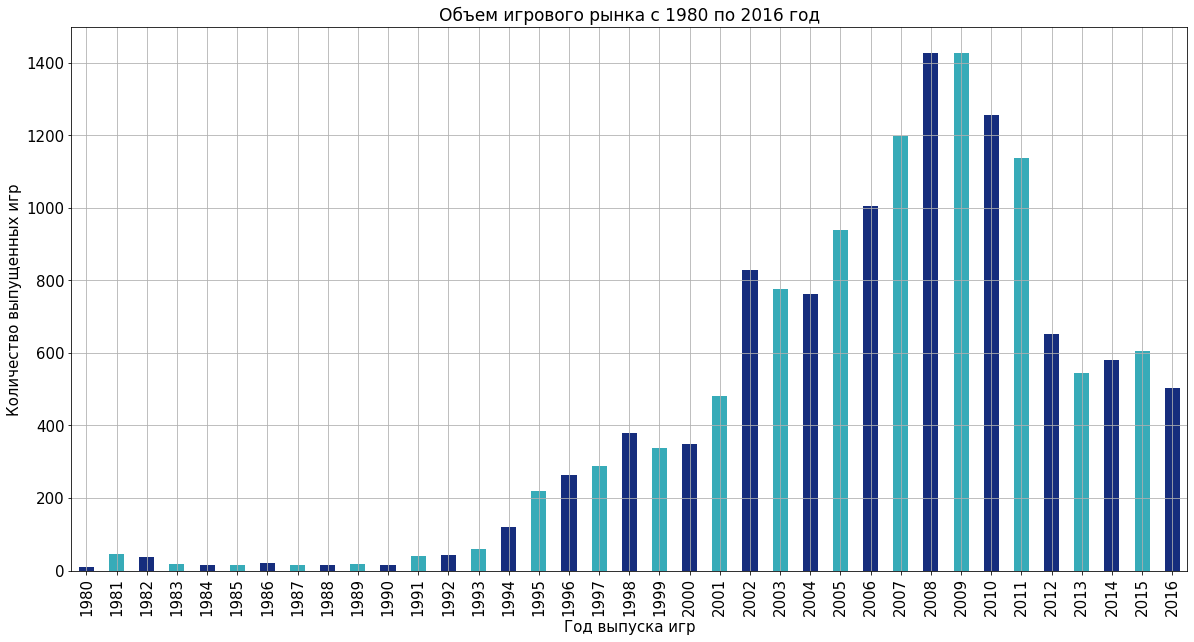

In [105]:
plt.figure(figsize=[20, 10]) 
df_game = (df
           .query('year_of_release != 999')
           .groupby('year_of_release')['name'].count()    # группируем данные по году релиза и строим график
          )
color = ['#162d7d', '#37abb8']
df_game.plot(kind='bar', grid=True, color=color)
plt.title('Объем игрового рынка с 1980 по 2016 год', fontsize=17)
plt.ylabel('Количество выпущенных игр', fontsize = 15)
plt.xlabel('Год выпуска игр', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.show()

Игры до 1994 года выходили крайне редко, после начинается глобальное развитие: пик релизов приходится на период с 2007 по 2011 годы (на самом деле золотое время шедевров). С 2012 наблюдается сильный спад, который сохраняется и в 2016 году, в нем было выпущено всего около 500 игр. Дают о себе знать мобильные платформы, многие геймеры постепенно перекочевали туда, да и рынок перенасытился игровыми новинками). Хотелось бы, конечно, в будущем увидеть новые данные, чтобы подтвердить свои предположения.

Данные о предыдущих годах помогут нам сформировать портрет типичного пользователя каждого выделенного региона, однако для прогнозирования продаж и будущих рекламных компаний нам важны актуальные данные. Пока что предполагаем таковой с 2012 по 2016 год, более точно определимся после анализа платформ.

### Анализ популярных платформ

In [106]:
df_platform = (df
               .pivot_table(index='platform', values='total_sales', aggfunc='sum')
               .sort_values(by='total_sales', ascending=False)
               .head(10)
              )
# сделаем список платформ с наибольшими суммарными продажами: сначала сводную таблицу по продажам, 
# потом сортировка по убыванию и сохраним первые десять позиций

Первые 10 позиций войдут в наш список самых крутых прибыльных платформ. На основе него построим распределение по годам и продажам.

<AxesSubplot:title={'center':'Распределение продаж по годам 10-ти самых прибыльных платформ'}, xlabel='Год выпуска игр', ylabel='Количество проданных игр, млн.копий'>

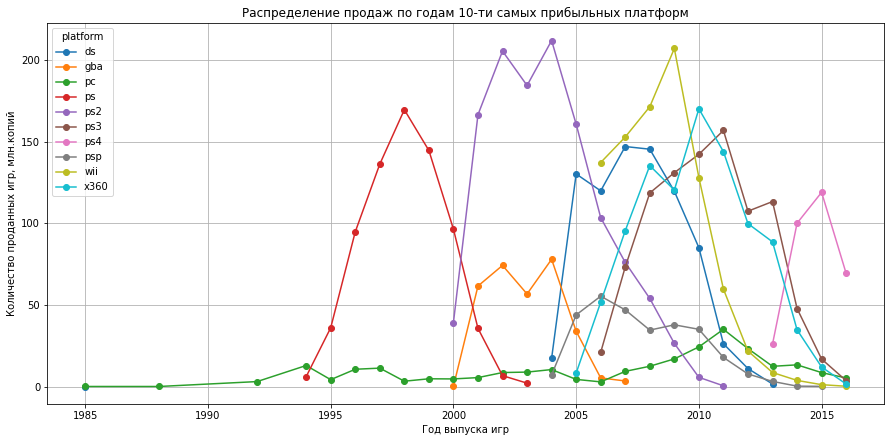

In [107]:
(
    df
    .query('platform in @df_platform.index and year_of_release != 999')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15,7), style='o-', grid=True, 
          xlabel= 'Год выпуска игр', 
          ylabel= ('Количество проданных игр, млн.копий'),
          title='Распределение продаж по годам 10-ти самых прибыльных платформ')
)

Итак, взглянем на получившиеся графики. В первую очередь заметна линия PC - за все время продажи стабильно не поднимаются выше 45 миллионов копий, был пик в начале 10-х годов, сейчас наблюдается спад (тот самый пик золотых шедевров). Платформа PS вошла на рынок в 94-ом, в 1998 был пик ее популярности и после - такое же резкое угасание, в среднем платформа "жила" пять лет (подразумеваются активные продажи). Приставка PS2 - бурный взрыв с 2001 по 2005. Wii: грандиозная выручка в 2009 и почти моментальное падение. Наблюдается некая закономерность: **большинство приставок имеют свой "цикл жизни" в среднем 5 лет**, после еще пару-тройку лет поддерживаются производителем и уходят с рынка. PC стоит особняком, его доходы ежегодно малы, но зато стабильны и с рынка компьютеры уходить точно не собираются. Относительно новой остается PS4 (ну это на 2016 год, разумеется).

У нас есть цель: спрогнозировать кампанию на 2017 год. Мы знаем, что:
* После пика конца нулевых рынок игр с 2012 года находится в упадке, но стабилен
* Среднее время жизни новых платформ - пять лет

На основе этого актуальным периодом правильно выбрать промежуток с 2012 по 2016 год: мы как раз увидим тенденции продаж на приставках, и объемы рынка будут примерно соответствовать ожидаемым.

In [108]:
df_actual = df.query('year_of_release >= 2012') # наша актуальная выборка

In [109]:
(df_actual
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
)

# рейтинг платформ по продажам за актуальный период

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


<AxesSubplot:title={'center':'Распределение продаж за актуальный период'}, xlabel='Год выпуска игр', ylabel='Количество проданных игр, млн.копий'>

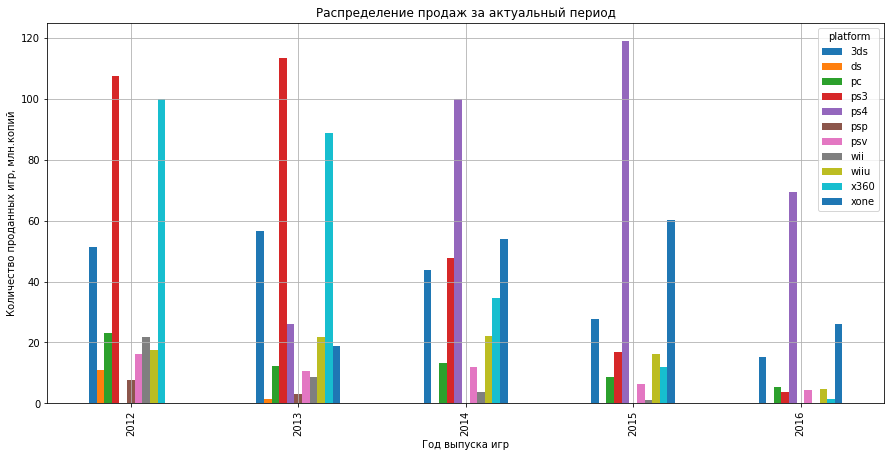

In [110]:
(
    df_actual
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,7), grid=True, 
          xlabel='Год выпуска игр',
          ylabel='Количество проданных игр, млн.копий',
          title='Распределение продаж за актуальный период')
)

# график продаж по годам в актуальной выборке

Вот что можно сказать о нашей пятерке платформ из сводной таблицы:
- PS4 (и сейчас остается в топе)
- PS3 (тень былых времен, в 2017 о популярности речи уже не идет (смотрим график выше)
- X360 (уже не актуально)
- 3DS (Nintendo пока еще интересен публике)
- XOne (пытается догнать Playstation и имеет какую-то долю на рынке)

К *потенциально прибыльным в 2017 платформам* в итоге отнесём: 
- **PS4** - самая актуальная.
- **Nintendo 3DS**
- **XBox One**
- **Nintendo WiiU** (с натяжкой, помним, что в 2016 был анонсирован преемник Nintendo Switch...)
- **PC** - почему? Потому что в отличии от остальных приставок продажи на пк всегда стабильны.


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

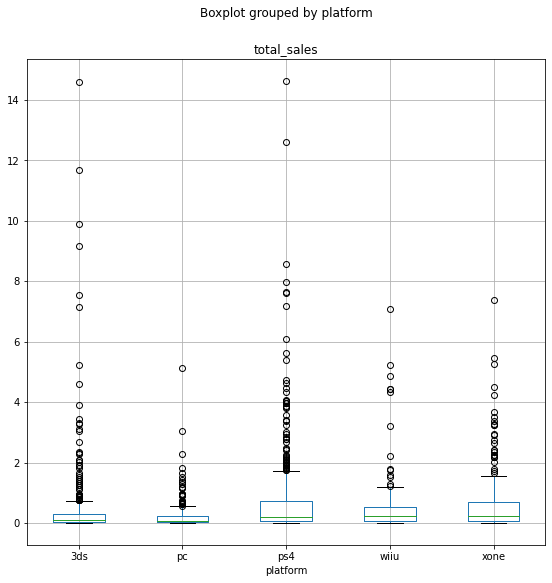

In [111]:
# диаграмма размаха продаж по выбранным платформам
platforms = ['ps4', '3ds', 'xone', 'wiiu', 'pc'] # актуальные платформы
(df_actual
 .query('platform in @platforms')
 .boxplot(by='platform', column='total_sales', figsize=(9,9))
)

Полученная диаграмма недостаточно подходит для формирования каких-либо выводов, медиану практически не видно, заметно только что крупные запуски были на нинтендо 3ds и ps4. Попробуем уточнить её вывод.

(0.0, 1.0)

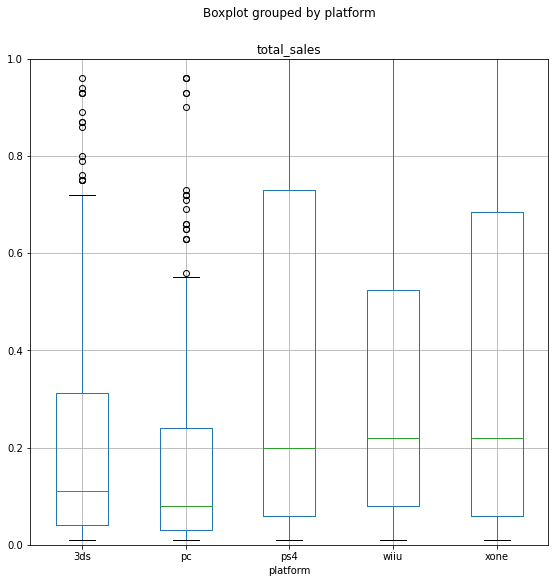

In [112]:
boxplot = (df_actual
           .query('platform in @platforms')
           .boxplot(by='platform', column='total_sales', figsize=(9,9))
          )
boxplot.set_ylim([0, 1])

Теперь можно остановиться на "ящиках с усами" поподробнее. На графике хорошо видно, что медиана продаж не поднимается выше 0,2 млн.копий, причем только у двух платформ: WiiU и Xbox One. Данные у всех платформ расположены несимметрично, третий квартиль расположен сильно дальше от медианы, чем нижний.

Может быть на Нинтендо и есть крупые запуски, но именно у двух популярных игровых консолей PS4 и Xbox One наибольшая прибыль: 25% игр у каждой из них продается более чем на 700 тыс.копий.

### Взаимосвязь рейтингов игр и продаж

In [113]:
def scatter_platform(data, gaming):
    data_plot = data[(data['platform'] == gaming) & (data['user_score'] != 999) & (data['critic_score'] != 999)]
    user_corr = data_plot['user_score'].corr(data_plot['total_sales'])
    critic_corr = data_plot['critic_score'].corr(data_plot['total_sales'])
    print(f'Исследуемая платформа: {gaming}')
    print(f'Корреляция отзывов пользователей и объема продаж: {user_corr}')
    print(f'Корреляция отзывов критиков и объема продаж: {critic_corr}')
    data_plot.plot(x='user_score', y='total_sales', kind='scatter', figsize=(4,4), alpha=0.5)
    plt.show()
    data_plot.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(4,4), alpha=0.5)
    plt.show()
    
# функция для визуализации зависимости между продажами и отзывами пользователей и критиков на каждой актуальной платформе

Исследуемая платформа: ps4
Корреляция отзывов пользователей и объема продаж: -0.03362497596528878
Корреляция отзывов критиков и объема продаж: 0.40589480145836687


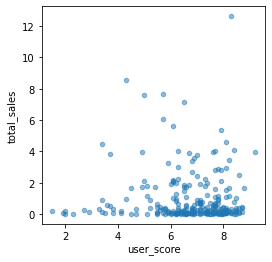

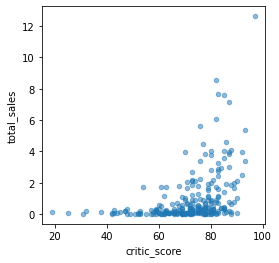

In [114]:
scatter_platform(df_actual, 'ps4') # диаграмма рассеяния для ps4

Исследуемая платформа: pc
Корреляция отзывов пользователей и объема продаж: -0.1369335107338787
Корреляция отзывов критиков и объема продаж: 0.23600773618792362


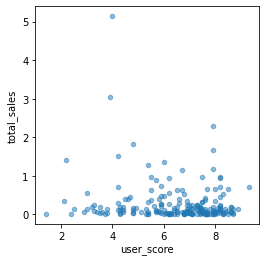

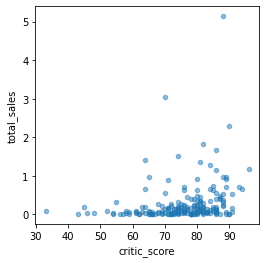

In [115]:
scatter_platform(df_actual, 'pc') # диаграмма рассеяния для pc

Исследуемая платформа: xone
Корреляция отзывов пользователей и объема продаж: -0.09400318326920852
Корреляция отзывов критиков и объема продаж: 0.41042203561296375


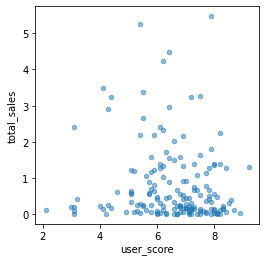

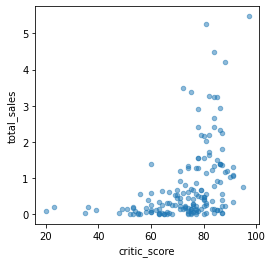

In [116]:
scatter_platform(df_actual, 'xone') # диаграмма рассеяния xbox one

Исследуемая платформа: wiiu
Корреляция отзывов пользователей и объема продаж: 0.3918479505297129
Корреляция отзывов критиков и объема продаж: 0.350882422488643


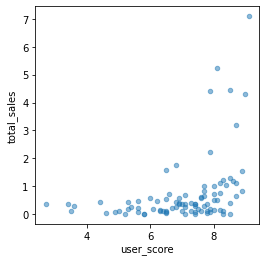

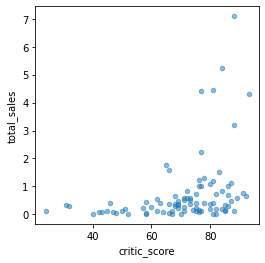

In [117]:
scatter_platform(df_actual, 'wiiu') # диаграмма рассеяния для nintendo wiiu

Исследуемая платформа: 3ds
Корреляция отзывов пользователей и объема продаж: 0.20181255007655283
Корреляция отзывов критиков и объема продаж: 0.31055301915326294


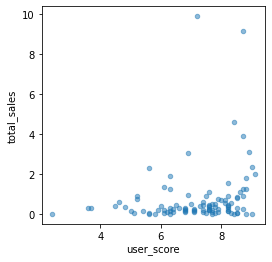

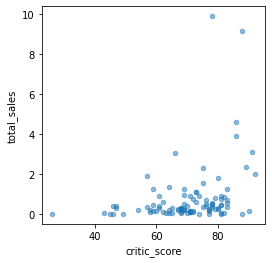

In [118]:
scatter_platform(df_actual, '3ds') # диаграмма рассеяния для nintendo 3ds

Коэффициент корреляции определяет степень взаимозависимости одной переменной от другой. 
Есть закономерность, но нет причинно-следственной связи.

Диаграммы рассеяния и расчеты показывают, что *между продажами игр и отзывами критиков есть прямая связь, однако при среднем показателе корреляции 0,3-0,4 она выражена слабо*. 

Слабая прямая корреляция между оценками пользователей и продажами присутствует только у двух платформ, и обе относятся к Nintendo, у остальных консолей *корреляционной связи пользовательского рейтинга и игровых продаж не наблюдается*.

### Рейтинг популярных жанров игр

Вернемся к нашему актуальному срезу данных и рассмотрим распределение по жанрам игр: какие из них вызывают больший интерес аудитории и, соответственно, прибыль.

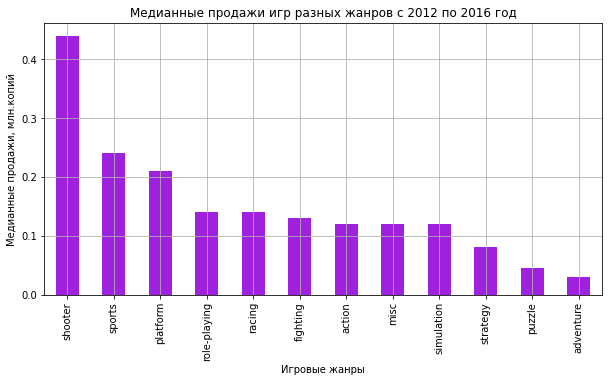

<AxesSubplot:title={'center':'Рейтинг жанров по количеству выпущенных с 2012 по 2016 год'}, xlabel='Игровые жанры', ylabel='Выпущенные игры, шт.'>

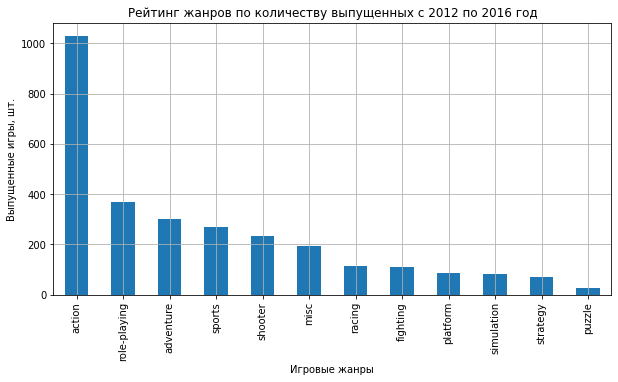

In [119]:
# сводная таблица жанров
df_actual_genre = (df_actual
                   .pivot_table(index='genre', values='total_sales', aggfunc=['median', 'count'])
                  )
df_actual_genre.columns = ['median', 'count']

(df_actual_genre['median']
 .sort_values(ascending=False)
 .plot(kind='bar', figsize=(10,5), color= '#9f21de', grid=True, 
       xlabel='Игровые жанры',
       ylabel='Медианные продажи, млн.копий',
       title='Медианные продажи игр разных жанров с 2012 по 2016 год')
)
plt.show()

(df_actual_genre['count']
 .sort_values(ascending=False)
 .plot(kind='bar', figsize=(10,5), grid=True, 
       xlabel='Игровые жанры',
       ylabel='Выпущенные игры, шт.',
       title='Рейтинг жанров по количеству выпущенных с 2012 по 2016 год')
)


**Пятерка самых доходных жанров игр:** 
1. Шутеры
2. Спортивные игры
3. Платформеры
4. РПГ
5. Гонки

**Пять жанром с наибольшим числом выпущенных игр:**
1. Экшен (отрыв от второго места больше чем в два раза)
2. РПГ
3. Адвенчуры
4. Спортивные игры
5. Шутеры

На рынке было представлено чуть больше 200 игр в жанре **шутер**, однако именно они **имеют самую большой объем продаж**, их медиана составляет более 400 тысяч копий на одну игру. Так же популярны спортивные игры и РПГ, они собирают неплохой доход и обширно представлены на рынке. Жанр экшен вышел в лидеры по количеству выпущенных игр, более тысячи различных вариантов, однако по объемам продаж находится всего лишь на седьмом месте; наводит на мысли, что разработчики этих игр больше берут количеством, но не качеством (всегда есть успешные игры, но с учетом того, каким объемом представлен этот жанр, спрогнозировать потенциальный хит будет довольно трудно).

Для планировании будущей рекламной кампании стоит ориентироваться на стабильные жанры по доходам, в первую очередь на шутеры, спортивные игры, РПГ, платформеры: вероятность того, что та или иная игра в этих жанрах будет хорошо продаваться, выше, чем у остальных.

## Интересы пользователей отдельных регионов

В разных регионах могут быть разные предпочтения, всем известно, что в Японии любят РПГ и новеллы, но чтобы это доказать, нужно составить отдельные рейтинги по регионам и определить предпочтения пользователей. Поэтому будем писать функцию и анализировать каждый регион.

<AxesSubplot:xlabel='genre'>

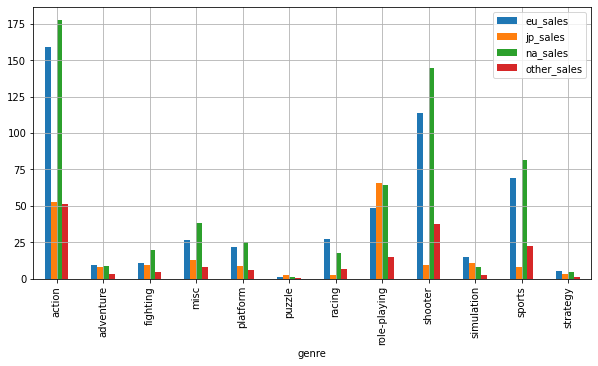

In [120]:
(df_actual
 .pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
 .plot(kind='bar', grid=True, figsize=(10,5))
)

Красиво, но рейтинг не выявить, разве что отмечу, что львиную долю всей прибыли приносят игроки из Северной Америки, на втором месте Европа и после Япония. Углубимся в анализ каждого региона по отдельности, а потом еще сравним их между собой по пунктам.

<AxesSubplot:xlabel='platform'>

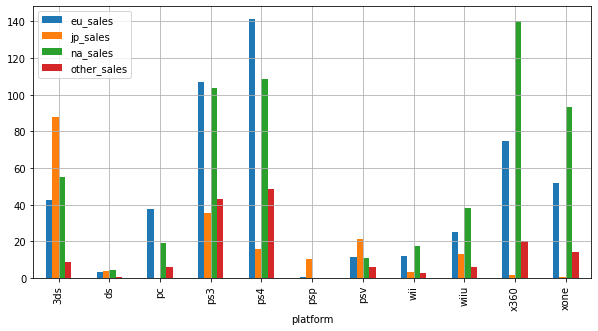

In [121]:
(df_actual
 .pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
 .plot(kind='bar', grid=True, figsize=(10,5))
)

А из этого графика заметно, что в каждом блоке свои фавориты игровых устройств, особенно выделяется американский столбец с приставками фирмы Xbox... все, хватит разводить лишние графики, перейдем к функции.

In [124]:
# функция для визуального сравнения показателей между регионами

color_dict = {'na_sales': '#4C10AE',
             'jp_sales': '#038A9D',
             'eu_sales': '#7B68EE'}
def typical_user2(value, region, name, ax):
    (df_actual
     .pivot_table(index=value, values=region, aggfunc='sum')
     .sort_values(by=region, ascending=False)
     .plot(kind='bar', grid=True, color=color_dict[region], ax=axes[ax], fontsize=15, 
           title= f'Рейтинг продаж в регионе {name}')
    )

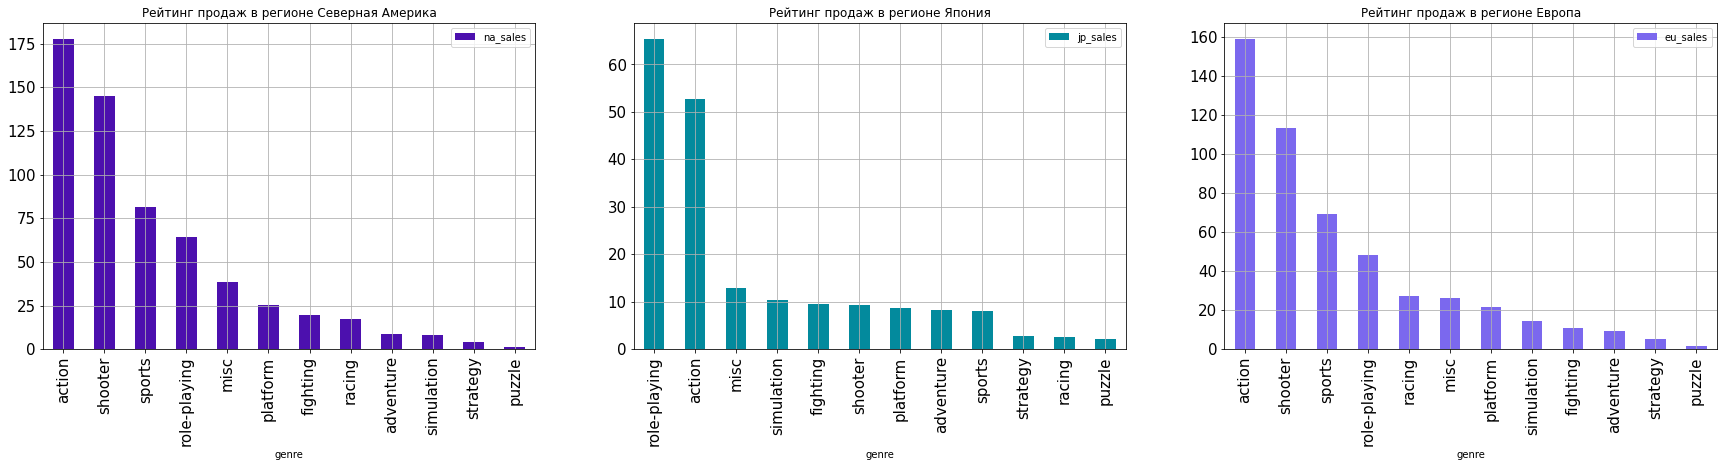

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6))  # сравнение продаж по жанрам

typical_user2('genre', 'na_sales', 'Северная Америка', 0)
typical_user2('genre', 'jp_sales', 'Япония', 1)
typical_user2('genre', 'eu_sales', 'Европа', 2)

По жанрам: у Америки и Европы схожие вкусы, и топ практически совпадает с вышеобозначенным. (неудивительно, если вспомнить что основную прибыль приносят именно эти два региона, то и топ формируют они). Япония не от мира всего, в ней на первой место вырываются рпг-игры (а я говорила!), уже после идет экшен.

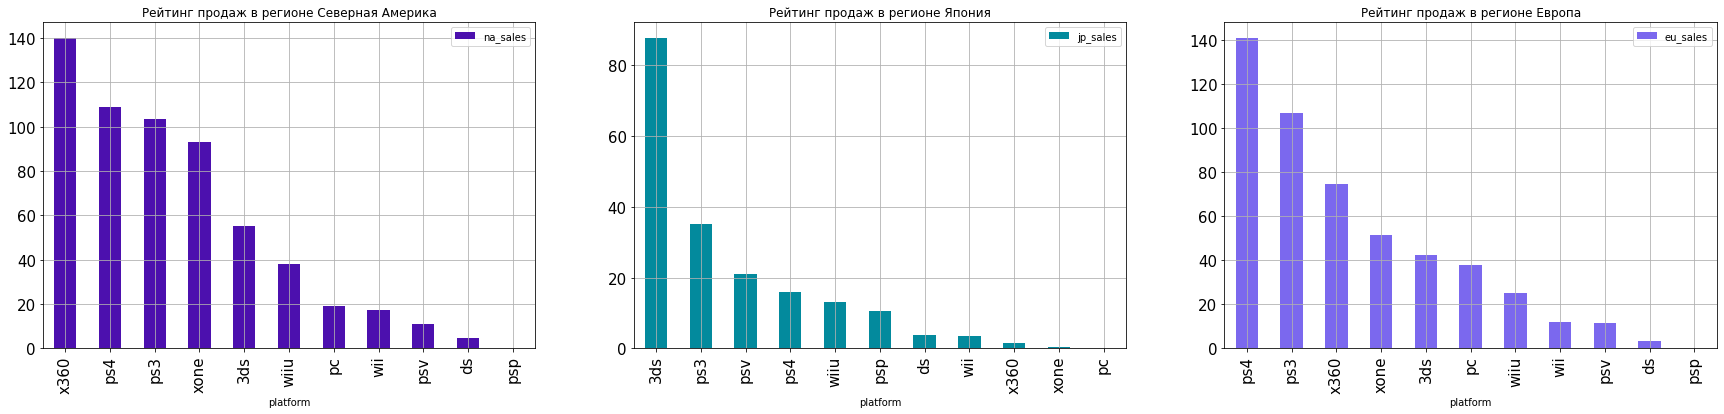

In [126]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) # сравнение продаж по платформам

typical_user2('platform', 'na_sales', 'Северная Америка', 0)
typical_user2('platform', 'jp_sales', 'Япония', 1)
typical_user2('platform', 'eu_sales', 'Европа', 2)

Вот здесь у нас произошло распутье между старым миром и новым. В Америке о-очень много играют на XBox 360, c отрывом за ней идут Playstation обоих поколений. Что интересно, в наш предыдущий список популярных платформ x360 не входил. В Японии преимущество за нинтендо, затем третья PlayStation и снова портативная приставка. В Японии любят портативные приставки, очевидно. Европейский регион предпочитает приставки ps обоих поколений, а уже после них продукцию Xbox. 

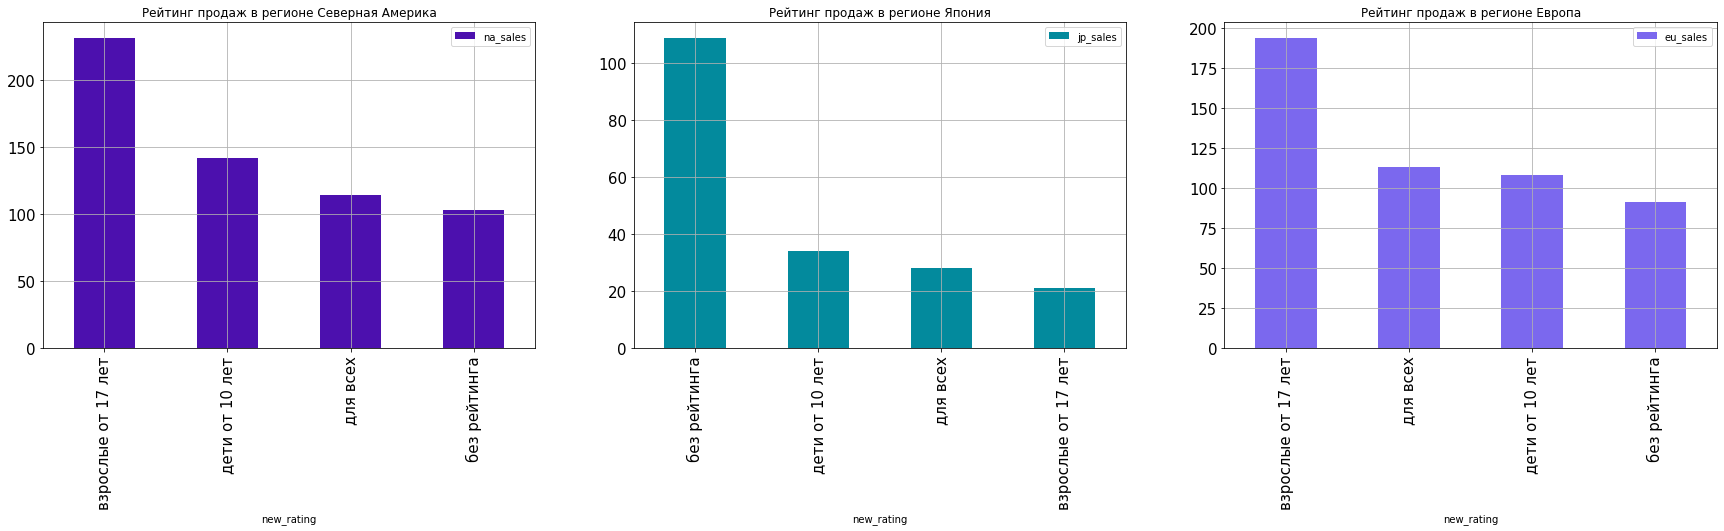

In [127]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6)) # сравнение продаж по рейтингу ESRB

typical_user2('new_rating', 'na_sales', 'Северная Америка', 0)
typical_user2('new_rating', 'jp_sales', 'Япония', 1)
typical_user2('new_rating', 'eu_sales', 'Европа', 2)

Что можно сказать: японцы очень себе на уме, рейтинг ESRB у них в подавляющем случае не имеет никакого влияния. Европа с Америкой идут очень близко, самые доходные игры идут с рейтингом от 17+ лет (тот самый экшн).



In [128]:
# для полного завершения, краткая сводка по каждому региону
def user_portrait(region, name):
    c1 = (df_actual
          .groupby('genre')
          .agg({region:'sum'})
          .sort_values(by=region, ascending=False)
          .head(3)
         )
    c2 = (df_actual
          .groupby('platform')
          .agg({region:'sum'})
          .sort_values(by=region, ascending=False)
          .head(3)
         )
    c3 = (df_actual
          .groupby('new_rating')
          .agg({region:'sum'})
          .sort_values(by=region, ascending=False)
          .head(3)
         )
    print(f'Регион: {name}')
    print('Топ жанров:\n', c1, end='\n\n')
    print('Топ приставок:\n', c2, end='\n\n')
    print('Самый популярный рейтинг ESRB:\n', c3, end='\n\n')


Вместо итога выведем "мини-досье" на среднего игрока из исследуемых регионов

In [129]:
user_portrait('na_sales', 'Северная Америка') # вот что предпочтет юзер из Америки

Регион: Северная Америка
Топ жанров:
          na_sales
genre            
action     177.84
shooter    144.77
sports      81.53

Топ приставок:
           na_sales
platform          
x360        140.05
ps4         108.74
ps3         103.38

Самый популярный рейтинг ESRB:
                     na_sales
new_rating                  
взрослые от 17 лет    231.57
дети от 10 лет        141.72
для всех              114.37



In [130]:
user_portrait('eu_sales', 'Европа') # примерный портрет европейца

Регион: Европа
Топ жанров:
          eu_sales
genre            
action     159.34
shooter    113.47
sports      69.09

Топ приставок:
           eu_sales
platform          
ps4         141.09
ps3         106.86
x360         74.52

Самый популярный рейтинг ESRB:
                     eu_sales
new_rating                  
взрослые от 17 лет    193.96
для всех              113.03
дети от 10 лет        108.33



In [131]:
user_portrait('jp_sales', 'Япония') # предпочтения Японии

Регион: Япония
Топ жанров:
               jp_sales
genre                 
role-playing     65.44
action           52.80
misc             12.86

Топ приставок:
           jp_sales
platform          
3ds          87.79
ps3          35.29
psv          21.04

Самый популярный рейтинг ESRB:
                 jp_sales
new_rating              
без рейтинга      108.84
дети от 10 лет     34.21
для всех           28.33



## Статистический анализ данных

###  Сравнение пользовательского рейтинга платформ Xbox One и PC

Для начала определимся: проверять гипотезы будем на актуальных данных (то есть с 2012 по 2016 год). Первый вопрос предлагает нам сравнить пользовательские рейтинги двух платформ - XOne и PC. Нам нужно провести статистический тест на двух небольших выборках двух генеральных совокупностей, но прежде требуется сформулировать нулевую гипотезу и альтернативную. Нулевая гипотеза формируется с учетом знака равенства и будет звучать так:

**H₀ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

В противоположность ей составляется альтернативная гипотеза:

**H₁ - средние пользовательские рейтинги платформ Xbox One и PC отличаются**

Нам не важно отклонение в большую или меньшую сторону, поэтому гипотеза двусторонняя.

Проведем t-тест, параметр equal_var оставляем без изменений. 

In [132]:
# сначала формируем выборки двух платформ
rating = (df_actual
          .query('user_score != 999')
          .pivot_table(index='name', columns='platform', values='user_score')
         )
df_xone = rating['xone'].dropna()       
df_pc = rating['pc'].dropna()

In [133]:
alpha = .01 # критический уровень статистической значимости ставлю 1%

results = st.ttest_ind(
    df_xone, 
    df_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Средняя пользовательский рейтинг игроков Xbox One:', df_xone.mean())
print('Средняя выручка пользовательский рейтинг игроков PC:', df_pc.mean())

p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу
Средняя пользовательский рейтинг игроков Xbox One: 6.521428571428572
Средняя выручка пользовательский рейтинг игроков PC: 6.428640776699029


При условии, что нулевая гипотеза верна, вероятность получить исследумый результат будет равна более 55%. При критическом пороге статистической значимости в 1% нулевая гипотеза не отвергается, и пользовательские рейтинги двух платформ **действительно не отличаются.**

### Сравнение пользовательского рейтинга жанров Action и Sports

Проверим второе предположение, как обычно, сначала формируем нулевую гипотезу со знаком равенства:

**H₀ - средние пользовательские рейтинги жанров Action и Sports одинаковые**

На основе нулевой гипотезы формируем альтернативную:

**H₁ - средние пользовательские рейтинги жанров Action и Sports разные**

Условия не изменились по сравнению с первым анализом, формируем выборки и проводим тест.

In [134]:
genre = (df_actual
         .query('user_score != 999')
         .pivot_table(index='name', columns='genre', values='user_score')
         )
df_action = genre['action'].dropna()       
df_sports = genre['sports'].dropna()

# выборки по жанрам

In [135]:
alpha = .01 # критический уровень статистической значимости ставлю 1%

results = st.ttest_ind(
    df_action, 
    df_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('Средняя пользовательский рейтинг игр жанра Action:', df_action.mean())
print('Средняя выручка пользовательский рейтинг игр жанра Sports:', df_sports.mean())

p-значение: 4.4321533132568645e-11
Отвергаем нулевую гипотезу
Средняя пользовательский рейтинг игр жанра Action: 6.909471066907775
Средняя выручка пользовательский рейтинг игр жанра Sports: 5.654486301369863


Полученное значение p-value дает нам достаточно оснований для того, чтобы отвергнуть нулевую гипотезу о равенстве пользовательского рейтинга исследуемых жанров, следовательно, **они действительно различаются**. На основе вышеуказанных исследований выходит, что в среднем игроки оценивают экшен-игры выше, чем спортивные.

## Общий вывод

Итак, проект вышел довольно насыщенным, поэтому попробуем структурировать все наши наработки:
* Нам были предоставлены данные за большой период с 1980 года, после анализа было принято решение выделить **актуальный период с 2012 по 2016 год** для дальнейшего исследования: он соответствует нашим требованиям и поможет соориентироваться в предпочтениях пользователей для формирования будущей рекламной кампании магазина.


* Были проанализированы доходы с каждого предоставленного устройства, на основе чего был сформирован **рейтинг потенциально прибыльных платформ**, а именно:
 1. Playstation 4
 2. Nintendo 3DS
 3. Xbox One
 4. Nintendo WiiU
 5. PC
 
 
* Аналогичным образом выделили **топ самых прибыльных и популярных жанров игр**:
 1. Шутеры
 2. Спортивные игры
 3. Платформеры
 4. РПГ
 
 
* В данных так же присутствуют рейтинги пользователей и критиков к выпущенным играм, большая часть данных отсутствует, однако на основе имеющихся оценок мы выяснили, что **между отзывами критиков и продажами игр присутствует прямая слабо-средняя корреляционная связь**, в отличие от оценок пользователей, которая таковой не имеет.
* Так как у нас есть информация о продажах в отдельных регионах, стало возможным проанализировать отдельные предпочтения игроков Северной Америки, Японии и Европы. В итоге получились следующие результаты (для анализа использовался актуальный период):
 - **американские игроки** предпочитают жанры экшен и шутеры, из платформ чаще выбирают Xbox и PS, по возрастному рейтингу больше всего продаются игры с ограничениями от 17 лет и выше
 - **игроки Европы** так же больше всего тратятся на экшен-игры и шутеры, однако из приставок предпочитают PS, влияние рейтинга ESRB у них аналогично Америке.
 - **Япония** имеет противоположных фаворитов: в играх они предпочитают РПГ и экшен, а играют чаще всего на приставках Nintendo. Возрастной рейтинг для них значения не имеет. 
* Проверка гипотез показала, что средние пользовательские рейтинги платформ Xbox One и PC `не имеют статистической разницы`, а вот `жанры sport и action игроки оценивают по-разному` с перевесом в сторону последнего.


* Для формирования будущей рекламной кампании будет полезно ориентироваться на платформы PS4 и Xbox One для американского и европейского рынка и на Nintendo последнего поколения - для японского. Экшен-игры и шутеры имеют стабильный доход и предпочитаются большинством игроков, однако будет неплохо обратить внимание на РПГ игры, так как они хорошо продаются в Азии. 